In [ ]:
from tensorflow import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
import numpy as np
train_images = train_images.reshape(train_images.shape[0], train_images.shape[1], train_images.shape[2],1)/255
train_images.astype(np.float32)
print(train_images.shape)

test_images = test_images.reshape(test_images.shape[0], test_images.shape[1], test_images.shape[2], 1)/255
train_images.astype(np.float32)
print(test_images.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
from keras import models
from keras import layers

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


In [ ]:
epochs = 5
batch_size = 64

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 576)              

In [ ]:
mod = model.fit(train_images, train_labels,
                        batch_size = batch_size,
                        epochs = epochs)

Epoch 1/5
938/938 [==============================] - 5s 5ms/step - loss: 0.1885 - accuracy: 0.9413
Epoch 2/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0481 - accuracy: 0.9851
Epoch 3/5
938/938 [==============================] - 4s 5ms/step - loss: 0.0326 - accuracy: 0.9902
Epoch 4/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0259 - accuracy: 0.9919
Epoch 5/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0190 - accuracy: 0.9942


In [ ]:
history_dict = mod.history
history_dict.keys()

dict_keys(['loss', 'accuracy'])

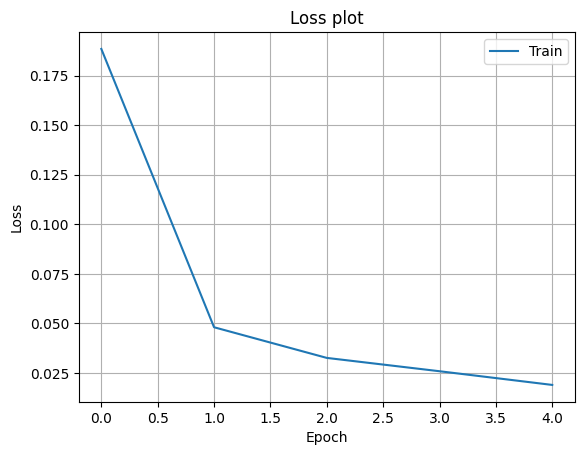

In [ ]:
plt.figure
plt.plot(history_dict['loss'])
# plt.plot(history_dict['val_loss'])
plt.title("Loss plot")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train"])
plt.grid()

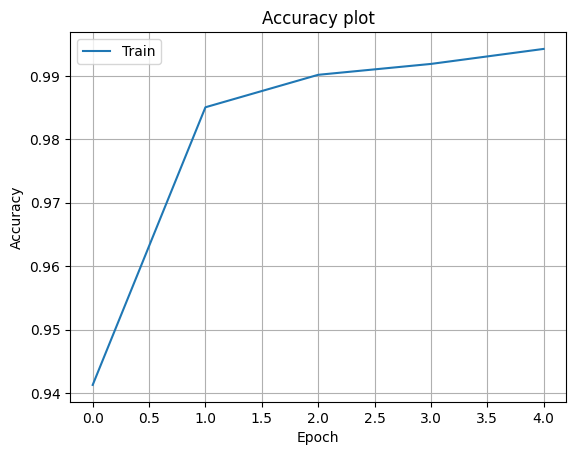

In [ ]:
plt.figure
plt.plot(history_dict['accuracy'])
# plt.plot(history_dict['val_accuracy'])
plt.title("Accuracy plot")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train"])
plt.grid()

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('test_acc:', test_acc)

313/313 [==============================] - 3s 7ms/step - loss: 0.0247 - accuracy: 0.9926
test_acc: 0.9926000237464905


In [ ]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3,3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3,3), activation='relu'))
model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(10, activation='softmax'))
model1.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])